1. We will delve deeply into auction theory.
2. We will demonstrate some auction theory properties by performing simulations of data. 
3. In these simulations, we will compare different schemes for auctions by varying the number of bidders and valuations.
4. At an auction, bidders make offers to buy the goods, and a bidder's valuation is how much the bidder offers to pay for the good.
5. We will start with the assumption that there are 2 bidders. 
6. We will simulate the auction 1000 times, resulting in 1000 valuations for these 2 bidders. 
7. Imagine that we are trying to sell a particular good, and that we are using Python to figure out the perfect pricing and allocation scheme.

### Posted Price Model 

We saw that the expected revenue when there are posted prices is
given by: 𝑝*𝑃𝑟(𝑉𝑖≥𝑝) 

for at least one i, where  𝑝  is the posted price, 
and $v_{i}$  is individual  𝑖's valuation of the good. 

Then, the expected revenue is equal to:  𝑝*(1−𝑃𝑟($v_{(N)}$<𝑝))=𝑝*(1−$F(p)^{N}$)



### The Analytial Solution

## Simulation

N, Number of Bidders =  2


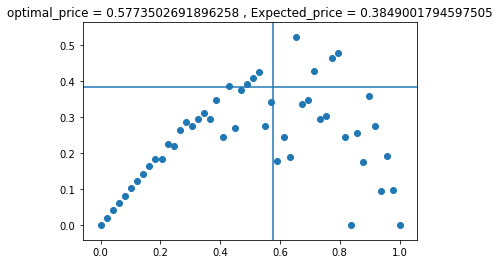

N, Number of Bidders =  5


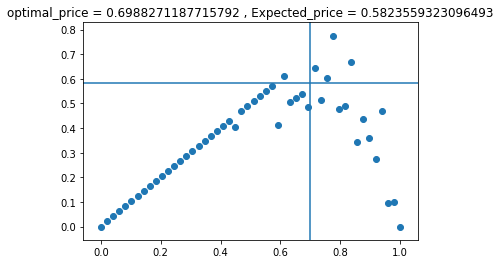

N, Number of Bidders =  9


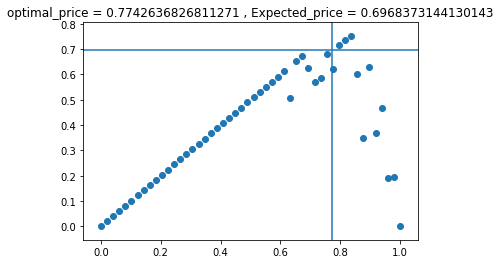

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def a_plotter(n,simulation_number):
    p_list = np.linspace(0,1,50)
    N = n
    p_dict = {}
    for p in p_list:
        simulation_list = []
        for i in range(simulation_number):
            simulation_list.append(np.max(np.random.uniform(size=N))>=p)
        p_dict[p] = simulation_list
    #p_dict.keys()


    key_list = []
    expect_list = []
    for key in p_dict.keys():
        #print(key, np.mean(p_dict[key]),float(key)*float( np.mean(p_dict[key])))
        key_list.append(key)
        expect_list.append(float(key)*float( np.mean(p_dict[key])))
        #print("#"*10)
        
    
    plt.scatter(key_list,expect_list)

    optimal_price =  1/((N+1)**(1/N))
    expected_revenue =  (N/(N+1)) * 1/((N+1)**(1/N))
    #print(optimal_price,expected_revenue)

    plt.axhline(expected_revenue)
    plt.axvline(optimal_price)
    plt.title(str("optimal_price = ")+str(optimal_price)+str(" , Expected_price = ")+str(expected_revenue))
    plt.show()
aa = [2,5,9]    
for a in aa:
    print("N, Number of Bidders = ",a)
    a_plotter(a, 10)

N, Number of Bidders =  2


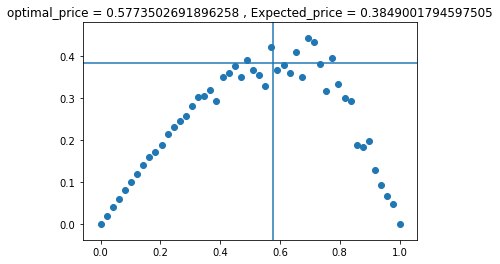

N, Number of Bidders =  5


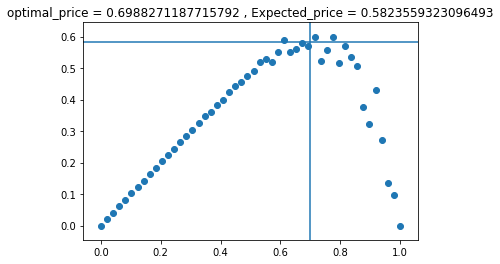

N, Number of Bidders =  9


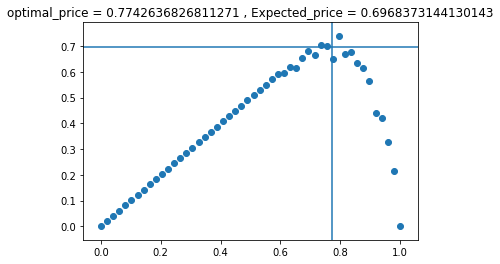

In [2]:
aa = [2,5,9]    
for a in aa:
    print("N, Number of Bidders = ",a)
    a_plotter(a, 100)

N, Number of Bidders =  2


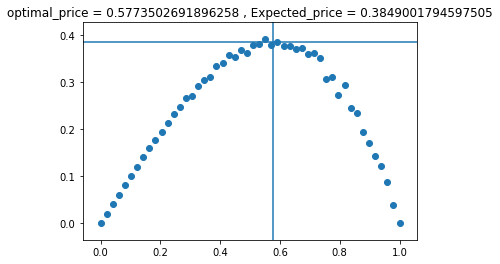

N, Number of Bidders =  5


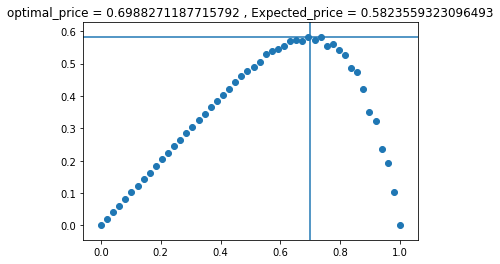

N, Number of Bidders =  9


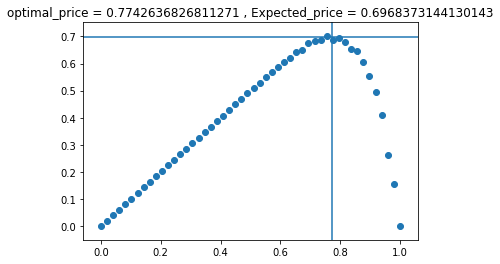

In [3]:
aa = [2,5,9]    
for a in aa:
    print("N, Number of Bidders = ",a)
    a_plotter(a, 1000)

We have performed this exercise for different numbers of simulations: 10, 100, 1000, and 10000. 
As we increase the number of simulations,the numeric revenue vector coincide more or less with the analytic solution. 

## EBay Auction 

On the website www.modelingonlineauctions.com, We can find a number of data sets from actual auctions conducted on eBay.

Download one involving the sale of Cartier watches: Cartier+3-day+auctions.csv. 

There are data on auctions of 18 different watches. For each auction, there is an 
1. auction ID, 
2. bids, 
3. time of each bid, 
4. bidder name, 
5. bidder rating, 
6. minimum bid for the auction, 
7. and winning bid for the auction. 


(Note: the winning bid is not the maximum bid submitted by the highest bidder, but rather the second-highest bid plus an increment.)


In [6]:
auctions = pd.read_csv("Cartier+3-day+auctions.csv")
auctions

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,1638893549,175.0,2.230949,schadenfreud,0,99.0,177.5
1,1638893549,100.0,2.600116,chuik,0,99.0,177.5
2,1638893549,120.0,2.600810,kiwisstuff,2,99.0,177.5
3,1638893549,150.0,2.601076,kiwisstuff,2,99.0,177.5
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4,99.0,177.5
...,...,...,...,...,...,...,...
245,1649726994,1651.0,2.673449,mumm29usa,26,500.0,2500.0
246,1649726994,1726.0,2.673681,mumm29usa,26,500.0,2500.0
247,1649726994,2000.0,2.987280,wworld@bignet.net,5,500.0,2500.0
248,1649726994,2500.0,2.999421,drumzz,8,500.0,2500.0


In [33]:
pd.Series(auctions.groupby(["auctionid"])["bid"].apply(list)).sort_values()

auctionid
1639453840    [1.0, 1.25, 1.5, 25.0, 2.0, 5.0, 10.0, 20.0, 5...
1643903372    [9.99, 11.0, 20.99, 20.0, 21.0, 25.0, 25.99, 2...
1643903116    [35.0, 12.5, 15.99, 21.99, 25.99, 31.99, 39.87...
1641142160                 [99.0, 100.0, 200.0, 175.01, 200.01]
1649131866    [100.0, 150.0, 105.0, 110.0, 115.0, 120.0, 125...
1643544538    [110.0, 100.0, 111.0, 113.5, 140.45, 150.9, 16...
1643885624    [150.0, 110.0, 126.0, 140.0, 151.0, 175.0, 200...
1642243766    [158.0, 155.0, 201.0, 208.0, 296.0, 240.0, 250...
1648233039                         [160.0, 176.5, 169.0, 174.0]
1638893549                  [175.0, 100.0, 120.0, 150.0, 177.5]
1645883276    [200.0, 155.0, 160.0, 169.5, 180.0, 185.0, 200...
1645914432    [200.0, 210.0, 220.0, 500.0, 250.0, 260.0, 280...
1648782304                        [250.0, 299.99, 400.0, 405.0]
1647149304    [300.0, 225.0, 300.0, 350.0, 350.0, 400.0, 400...
1643075711    [350.0, 500.0, 450.0, 500.0, 550.0, 700.0, 700...
1647870862    [600.0, 125.99, 

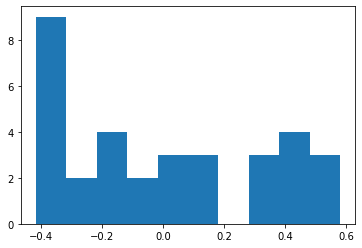

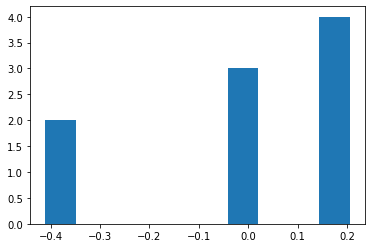

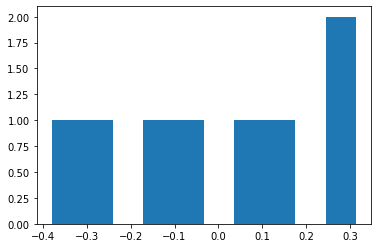

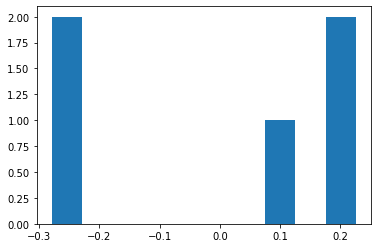

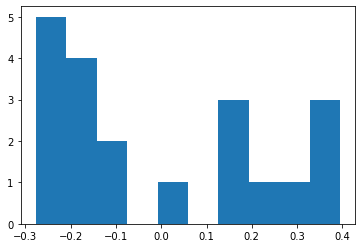

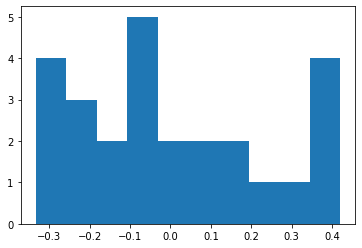

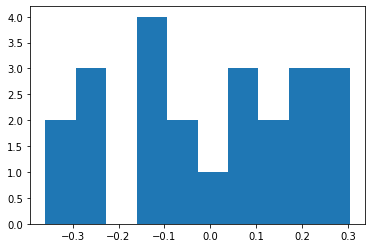

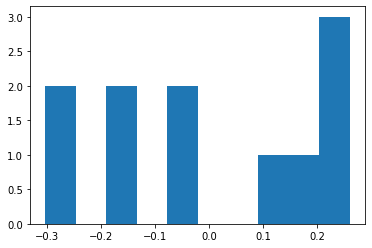

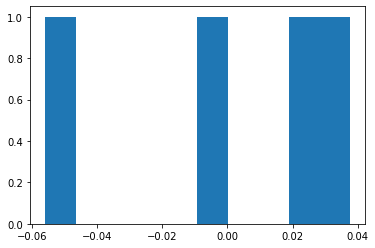

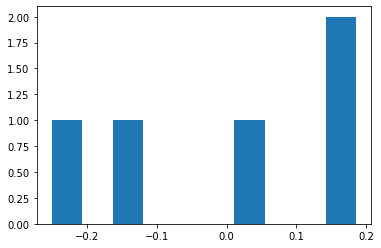

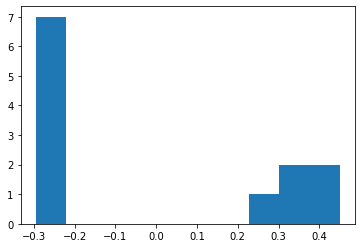

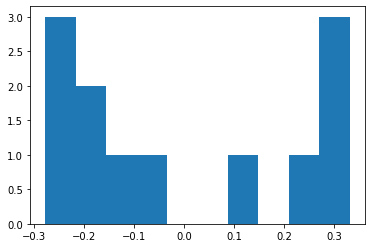

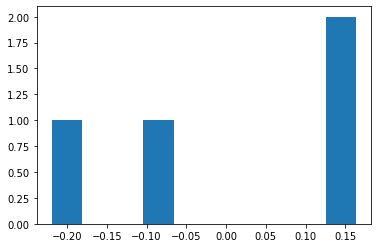

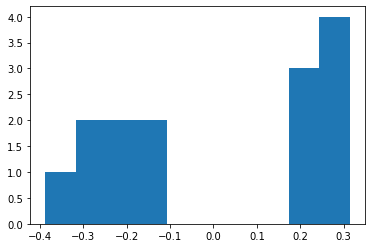

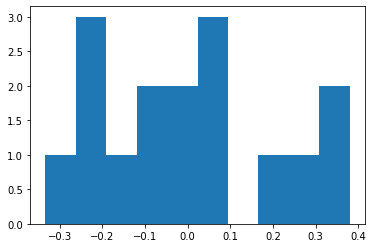

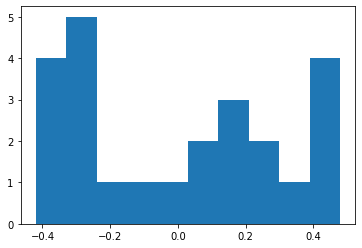

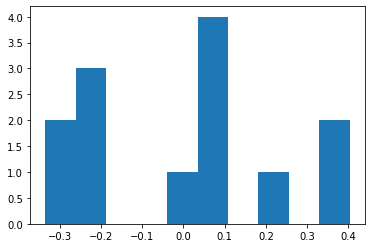

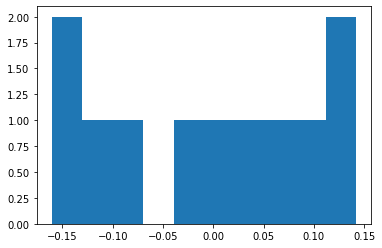

1.0308186035187399

In [41]:
mean_of_ratio_of_second_highest_to_third_highest_bid = []
for x in pd.Series(auctions.groupby(["auctionid"])["bid"].apply(list)).sort_values():
    mean_of_ratio_of_second_highest_to_third_highest_bid.append(x[-1]/x[-2])
    plt.hist((x-np.mean(x))/np.max(x))
    plt.show()
np.mean(mean_of_ratio_of_second_highest_to_third_highest_bid)    

In [21]:
grouper = auctions.groupby(["auctionid"])
for i,frame in grouper:
    print(i)
    print(frame["openbid"].max(),frame["price"].max(),str("Percentage Increase"),100*(frame["price"].max()-frame["openbid"].max())/frame["openbid"].max())
    print("="*10)

1638893549
99.0 177.5 Percentage Increase 79.29292929292929
1639453840
1.0 355.0 Percentage Increase 35400.0
1641142160
99.0 200.01 Percentage Increase 102.03030303030303
1642243766
99.99 355.0 Percentage Increase 255.03550355035506
1643075711
200.0 1225.0 Percentage Increase 512.5
1643544538
99.0 405.0 Percentage Increase 309.09090909090907
1643885624
100.0 326.0 Percentage Increase 226.0
1643903116
9.99 40.87 Percentage Increase 309.10910910910906
1643903372
9.99 26.0 Percentage Increase 160.26026026026022
1645883276
149.99 610.0 Percentage Increase 306.69377958530566
1645914432
199.0 511.0 Percentage Increase 156.78391959798995
1646353713
1200.0 1735.0 Percentage Increase 44.583333333333336
1647149304
100.0 752.56 Percentage Increase 652.56
1647870862
99.99 1250.0 Percentage Increase 1150.1250125012502
1648233039
150.0 176.5 Percentage Increase 17.666666666666668
1648782304
199.0 405.0 Percentage Increase 103.51758793969849
1649131866
99.0 304.98 Percentage Increase 208.060606060606